# Investigating virtual spiral tips
Tim Tyree<br>
11.21.2020

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show


import numba, trackpy, sklearn
# from numba import njit, jit, vectorize
# from PIL import Image
# import imageio
# import cv2 as cv
# from dask import daskbag as db
#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

#load the libraries
from lib import *
from lib.dist_func import *
# from lib.operari import *
# from lib.ProgressBar import *
# from lib.minimal_model import *
# from lib.TexturePlot import *
# from lib.get_tips import *
# from lib.minimal_model import *
# from lib.intersection import *
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

100000
Automatic calling is: Smart


# step 1: compute birth-death rates from log and identify a fast birth-death event from the resulting csv

In [104]:
from lib.routines.bdrates import *

In [105]:
# input_file_name = search_for_file()
input_file_name = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/ic_200x200.001.13_log.csv"
# output_file_name = input_file_name.replace('log.csv','bdrates.csv')

save_folder="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/"
outdir = log_to_bdrates_routine(input_file_name, save_folder, min_time_between_samples=1)
# log_to_bdrates(input_file_name, output_file_name)

data_dir_bdrates = outdir

In [106]:
df =  pd.read_csv(data_dir_bdrates)

In [107]:
df.head()

,t,n,dn,rates
0,39,20,-2.0,0.027778
1,75,18,-4.0,0.002551
2,467,14,2.0,0.015625
3,531,16,-2.0,0.008929
4,643,14,-2.0,0.002976


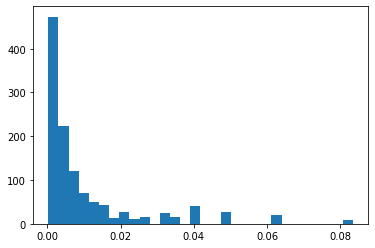

In [108]:
plt.hist(df.rates, bins=30)
plt.show()

In [109]:
#find that highest bdrates
df[df.rates==df.rates.max()]
df

,t,n,dn,rates
0,39,20,-2.0,0.027778
1,75,18,-4.0,0.002551
2,467,14,2.0,0.015625
3,531,16,-2.0,0.008929
4,643,14,-2.0,0.002976
...,...,...,...,...
1179,481915,6,-2.0,0.000962
1180,482955,4,-2.0,0.027778
1181,482991,2,2.0,0.008929
1182,483103,4,-2.0,0.011905


In [110]:
max_high_frequency_times = df[df.rates==df.rates.max()].t.values
first_max_high_frequency_time = max_high_frequency_times[0]

In [118]:
df[df.t==first_max_high_frequency_time]
#Eureka! These 't' are really indices
max_high_frequency_indices = max_high_frequency_times

# import tip log and visualize the tips at those frames
#TODO(later): compute the texture at that earliest time

In [126]:
os.chdir(save_folder)
data_dir_txt = 'ic_200x200.001.13.npz'
data_dir_log = "ic_200x200.001.13_log.csv"
data_dir_traj  = "ic_200x200.001.13_traj_sr_400_mem_2.csv"

In [127]:
df = pd.read_csv(data_dir_log)

In [139]:
#Eureka! These 't' are really indices
max_high_frequency_time = float(df[df.index==max_high_frequency_indices[3]].t.values)


In [140]:

#get tip data to plot
gf = df[df.t==max_high_frequency_time-1]
x_values = gf.x.values
y_values = gf.y.values
c_values = np.abs(gf.theta.values)
print(c_values)

gf = df[df.t==max_high_frequency_time]
x_values = gf.x.values
y_values = gf.y.values
c_values = np.abs(gf.theta.values)
print(c_values)

gf = df[df.t==max_high_frequency_time+1]
x_values = gf.x.values
y_values = gf.y.values
c_values = np.abs(gf.theta.values)
print(c_values)

[1.88331 0.90145 1.66922 1.26239 2.87989     nan 2.71775 2.36941 1.88331
 0.90145 1.66922 1.26239 2.87989     nan 2.71775 2.36941]
[1.90807 0.63428 1.67293 1.48849     nan 2.2201      nan 2.02781 1.90807
 0.63428 1.67293 1.48849     nan 2.2201      nan 2.02781]
[1.93142 0.50143 1.68232 1.29659     nan     nan 1.93142 0.50143 1.68232
 1.29659     nan     nan]


In [115]:
sum(df.t==max_high_frequency_time)
sum(np.isclose(df.t,max_high_frequency_time))

0

In [116]:
df.t.describe()

count    483189.000000
mean      14473.330943
std        8226.487881
min           0.000000
25%        7427.000000
50%       14677.000000
75%       21714.000000
max       28581.025000
Name: t, dtype: float64

In [88]:
max_high_frequency_time

65119

In [119]:
src = data_dir_log
df = pd.read_csv(src)
df.head()

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt
0,0.0,20,0.95045,47.03408,1.98477,0.49952,1.00000,43.74147,0.13557,0.52435,0.01091,0.83900,0.32697,-0.00084,-0.00105
1,0.0,20,6.34369,2.40403,1.17551,-1.02701,6.66390,1.11790,0.61298,0.50346,0.07454,0.82358,-0.00010,-0.00572,-0.00103
2,0.0,20,10.57992,199.59560,2.89619,-0.14802,1.05754,0.08225,1.05059,0.48484,0.27666,0.87655,0.00795,-0.02123,-0.00110
3,0.0,20,51.37607,0.34081,1.50927,1.00000,-0.67824,0.99233,1.69736,0.50706,0.55666,0.93134,-0.01240,-0.04272,-0.00116
4,0.0,20,52.38630,57.23394,2.02178,3.69757,-1.45046,-0.23487,2.12278,0.47905,0.06825,0.81568,0.00059,-0.00524,-0.00102


# TODO: scatter plot spiral tips as stars, coloring black/white by c_values during a high-frequency birth-death event

In [143]:
c_values = df.theta.isnull().values

In [145]:
c_values

array([False, False, False, ..., False,  True,  True])

In [155]:
df.head()

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt
0,0.0,20,0.95045,47.03408,1.98477,0.49952,1.00000,43.74147,0.13557,0.52435,0.01091,0.83900,0.32697,-0.00084,-0.00105
1,0.0,20,6.34369,2.40403,1.17551,-1.02701,6.66390,1.11790,0.61298,0.50346,0.07454,0.82358,-0.00010,-0.00572,-0.00103
2,0.0,20,10.57992,199.59560,2.89619,-0.14802,1.05754,0.08225,1.05059,0.48484,0.27666,0.87655,0.00795,-0.02123,-0.00110
3,0.0,20,51.37607,0.34081,1.50927,1.00000,-0.67824,0.99233,1.69736,0.50706,0.55666,0.93134,-0.01240,-0.04272,-0.00116
4,0.0,20,52.38630,57.23394,2.02178,3.69757,-1.45046,-0.23487,2.12278,0.47905,0.06825,0.81568,0.00059,-0.00524,-0.00102


In [154]:
# df.describe().T

In [157]:
print(f"Is the ratio of virtual spiral tips to spiral tips = {1-df.t.count()/df.theta.count():.3f}?")

Is the ratio of virtual spiral tips to spiral tips = -0.081?


In [159]:
df.theta.dropna()

0         1.98477
1         1.17551
2         2.89619
3         1.50927
4         2.02178
           ...   
483181    2.23391
483182    2.61639
483183    2.23391
483184    2.56158
483186    2.56158
Name: theta, Length: 446800, dtype: float64

# TODO(later): 4 panel figure of 1 spiral tip trajectory
- and then, TODO: ^super impose a list of trajectories/all trajectories in trial

# identify/isolate a virtual spiral tip from a high frequency rate

In [411]:
#step 1: identify when a high freq rate occurs. (start to finish)
# file = search_for_file()
file = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log.csv'

In [412]:
_,df_rates = compute_bdrates_from_log_w_mean(src=file, min_time_to_next_event = 0, min_time = 100)

In [413]:
#the first high frequency rates
df_rates[(df_rates.rate>0.9) & (df_rates.time>300)].head()

,dn,rate,n,time
21,2,1.0,8,778.0
24,2,1.0,10,804.0
28,-2,1.0,18,837.0
39,-2,1.0,12,1101.0
40,2,1.0,10,1102.0


In [440]:
#step 2: isolate the virtual spiral tip
# file = search_for_file()
file = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_traj_sr_400_mem_2.csv"
# = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log.csv'
df = pd.read_csv(file)

In [441]:
df.head()

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
0,0.0,18,0.94274,48.96139,NaN,0.38211,1.01060,41.37542,0.20304,0.59937,0.01250,0.84248,-0.00583,-0.00096,-0.00105,0,0
1,0.0,18,9.11660,199.74377,2.91912,-0.11568,1.05027,0.12146,1.04401,0.42146,0.48190,0.94701,0.34879,-0.03698,-0.00118,0,1
2,0.0,18,50.94590,0.57368,1.06866,1.00000,-0.71163,0.95257,3.95968,0.68626,0.49964,0.93059,0.09029,-0.03835,-0.00116,0,2
3,0.0,18,53.49084,57.27768,1.88416,3.71867,-1.52116,0.09061,1.84112,0.57380,0.09045,0.82437,0.00076,-0.00694,-0.00103,0,3
4,0.0,18,74.34072,198.22496,2.38565,1.29924,0.88857,0.11788,1.33386,0.59237,0.49116,0.94783,-0.05997,-0.03769,-0.00118,0,4


In [442]:
#WARNING: times resulting from compute_bdrates_from_log_w_mean may be 100 too big
t = 804#17
df[df.t==t+1].head().n

9608    8
9609    8
9610    8
9611    8
9612    8
Name: n, dtype: int64

In [542]:
t = 1520#17
df.groupby('t').mean().n.loc[t-1:t+4]

t
1519.0     6.0
1520.0    10.0
1521.0    10.0
1522.0    10.0
1523.0    10.0
1524.0     8.0
Name: n, dtype: float64

In [444]:
ff = df[(df.t>=t)&(df.t<=t+3)]

# visualize a virtual spiral tip from a high frequency rate

{162, 163, 170, 171, 172, 173, 192, 193, 200, 201, 206, 207, 208, 209, 210, 211, 212, 213, 116, 117}


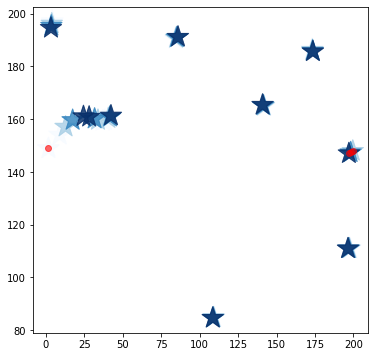

In [546]:
#step 2: isolate the virtual spiral tip
# file = search_for_file()
file = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_traj_sr_400_mem_2.csv"
# = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log.csv'
df = pd.read_csv(file)
t = 1520#17
pid = 206#117
# pid = 210#162]#206]#212]#210]#206]
ff = df[(df.t>=t)&(df.t<=t+3)]
t0 = np.min(ff.t.values)
x_values = ff.x.values
y_values = ff.y.values
c_values = ff.t.values-t0
#virtual spiral tip pid : 210]#
#daughter spiral tip pid : 212]#
#parent spiral tip pid : 208]#
sf = ff[ff.particle==pid]
xv_values = sf.x.values
yv_values = sf.y.values
# af = df[(df.t==t+4)]#(df.t==t-1)]#|(df.t==t+4)]
# xa_values = af.x.values
# ya_values = af.y.values
plt.figure(figsize=(6,6))
plt.scatter(x=x_values,y=y_values,c=c_values, cmap='Blues',marker='*',alpha=0.6,s=500)
# plt.scatter(x=xa_values,y=ya_values,c='r',marker='o',alpha=0.6)
plt.scatter(x=xv_values,y=yv_values,c='r',marker='o',alpha=0.6)
print(set(ff.particle.values))
plt.show()

In [517]:
162, 170, 172, 192, 200, 206, 208, 210, 212, 116
#206, 212 = daughter
#208, 210 = virtual
#TODO: see if this high frequency bd event happens for other V_threshold at a nearby time

#TODO: find the particle number of the virtual spiral tips
#TODO: describe the features of those virtural spiral tips.  Do the thetas look funny?
len(list(set(ff.particle.values)))
#TODO: count how many pid's are visually distinct

20

In [449]:
# print('a virtual spiral tip')
# df[df.particle==210]#.describe().T

In [547]:
# print('a normal spiral tip')
# df[df.particle==162].describe().T
# boo = (df.t>=t)&(df.t<=t+3)
boo = (df.t>=t-3)&(df.t<=t+3+3)

#theta for virtual spiral tip
ff = df[boo][df[boo].particle==210]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
alpha = np.abs(np.pi/2-w)
y_values_v = alpha
x_values_v = ff.t.values-t

#theta for virtual spiral tip
ff = df[boo][df[boo].particle==208]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
alpha = np.abs(np.pi/2-w)
y_values_vv = alpha
x_values_vv = ff.t.values-t

#theta for daughter spiral tip
ff = df[boo][df[boo].particle==213]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
alpha = np.abs(np.pi/2-w)
y_values_d = alpha
x_values_d = ff.t.values-t

#theta for parent spiral tip
ff = df[boo][df[boo].particle==206]#.describe().T
# ff = df[boo][df[boo].particle==201]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
alpha = np.abs(np.pi/2-w)
y_values_p = alpha
x_values_p = ff.t.values-t

#theta for typical spiral tip
# ff = df[boo][df[boo].particle==208]#.describe().T
ff = df[boo][df[boo].particle==201]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
alpha = np.abs(np.pi/2-w)
y_values_t = alpha
x_values_t = ff.t.values-t

#theta for typical spiral tip
# ff = df[boo][df[boo].particle==208]#.describe().T
ff = df[boo][df[boo].particle==162]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
alpha = np.abs(np.pi/2-w)
y_values_tt = alpha
x_values_tt = ff.t.values-t

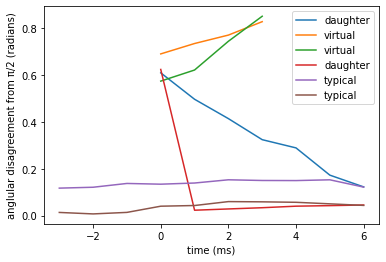

In [548]:

# print('virtual spiral tip has mean ± std')
# print('daughter spiral tip has mean ± std')
# print((np.mean(alpha),np.std(alpha)))
plt.plot(x_values_d,y_values_d,label='daughter')
plt.plot(x_values_v,y_values_v,label='virtual')
plt.plot(x_values_vv,y_values_vv,label='virtual')
plt.plot(x_values_p,y_values_p,label='daughter')
plt.plot(x_values_t,y_values_t,label='typical')
plt.plot(x_values_tt,y_values_tt,label='typical')

plt.xlabel('time (ms)')
plt.ylabel('anglular disagreement from π/2 (radians)')
plt.legend()
plt.show()

actual spiral tip has mean ± std
(1.5191587916376954, 0.09676212441678192)


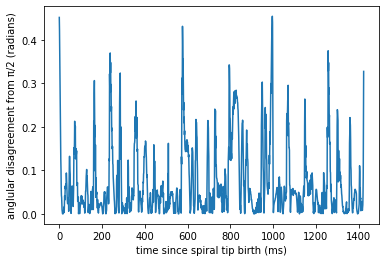

In [199]:
#theta for actual spiral tip
ff = df[df.particle==162]#.describe().T
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values
print('actual spiral tip has mean ± std' )
print((np.mean(w),np.std(w)))
plt.plot(np.abs(np.pi/2-w))
plt.xlabel('time since spiral tip birth (ms)')
plt.ylabel('anglular disagreement from π/2 (radians)')
plt.show()

the above suggests a theta_threshold of 1.2 would work quite well.

## visualize birth death rates

In [625]:
# #import data
# os.chdir(folder_name)
# df = pd.read_csv(file_out)

#drop termination times
# df.dropna(inplace=True)
# df = d.copy()

#drop rows with rates over 100/ms
# df = df.loc[df.rates<=1].copy()

# df = df.loc[df.rates<=0.02].copy()
# df = df.loc[df.rates<=0.1].copy()

def get_bdrate_plot_data(df):
    dn_list = sorted(set(df.dn.values))
    dn_list = [-2,2]

    np.mean(df.n.values)

    #compute median rates and IQR for the error bars corresponding to each category in dn_list
    errorbar_data_list = []
    for dn in dn_list:  
        #iterate over n for each dn
        df2 = df.loc[df.dn==dn].copy()
        n_list = sorted(set(df2.n.values))
        y_val_list = []
        y_err_1_list = []
        y_err_2_list = []
        for n in n_list:
            df3 = df2.loc[df2.n == n].copy()
            y_val, y_err_1, y_err_2 = df3.describe().T[['50%', '25%', '75%']].loc['rates'].values
            y_err_2 = float(y_err_2 - y_val)
            y_err_1 = float(y_val - y_err_1)
            y_val = float(y_val)
            y_val_list.append(y_val)
            y_err_1_list.append(y_err_1)
            y_err_2_list.append(y_err_2)
        # errorbar_data = (dn, n_list, y_val_list, y_err_1_list, y_err_2_list)
        errorbar_data = {'dn':dn, 
                         'n_list':n_list, 
                         'y_val_list':y_val_list, 
                         'y_err_1_list':y_err_1_list, 
                         'y_err_2_list':y_err_2_list
                        }
        errorbar_data_list.append(errorbar_data)    

    #retrieve scatter plot data points for each category in dn_list
    scatter_data_list = []
    for dn in dn_list:  
        df2 = df.loc[df.dn==dn].copy()
        x_values = df2.n.values
        y_values = df2.rates.values
        scatter_data = {'dn':dn, 
                         'x_values':x_values, 
                         'y_values':y_values, 
                        }
        scatter_data_list.append(scatter_data)

    #assign a color/label/other formatting to each category in dn_list
    color_list_raw = ['red', 'blue', 'green', 'orange', 'brown', 'purple']
    formatting_data_list = []
    for i, dn in enumerate(dn_list):
        formatting_data = {
            'dn': dn,
            'color': color_list_raw[i],
            'label':f'$W_{{{int(dn):+d}}}$'
        }
        formatting_data_list.append(formatting_data) 
    retval = formatting_data_list, scatter_data_list, errorbar_data_list, 
    return retval

formatting_data_list, scatter_data_list, errorbar_data_list = get_bdrate_plot_data(df=d)

In [626]:
assert (len(formatting_data_list) is len(scatter_data_list ))
assert (len(formatting_data_list) is len(errorbar_data_list))

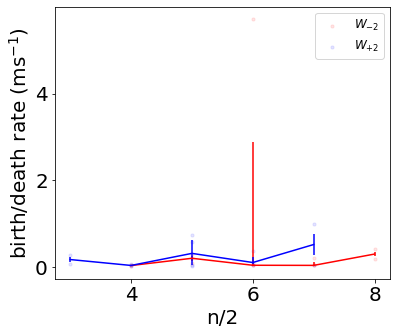

In [627]:
saving = False

savefig_dir = f'{nb_dir}/Figures/birth_death_analysis'
savefig_fn = 'birth_death_rates_ic2-from-log.png'
# savefig_fn = 'birth_death_rates_log.png'
log_scale = False
fontsize=20
figsize=(6,5)

# def birth_death_plot(*y_axis_struct_list):

# plot birth death rates with IQR y error bars with n on the x axis
fig, ax = plt.subplots(figsize=figsize)
for scatter_data, errorbar_data, formatting_data in zip(
    scatter_data_list, errorbar_data_list, formatting_data_list):

    dn, x_values, y_values = scatter_data.values()
    dn, n_list, y_val_list, y_err_1_list, y_err_2_list = errorbar_data.values()
    dn, color, label = formatting_data.values()
    yerr = np.array(list(zip(y_err_1_list,y_err_2_list))).T
    
    ax.scatter(x=x_values/2,y=y_values, c=color, s=10, alpha=0.1, label=label)
    ax.errorbar([n/2 for n in n_list], y_val_list, yerr=yerr, c=color)
    
# ax.legend(loc='top')

# ax.set_xticks([2,4,6,8, 10, 12])
# # ax.set_yticks([0,10,20,30,40,50])
# ymin, ymax = ax.get_ylim()
# ax.set_ylim((1e-3,0.4))

ax.legend(loc='best', fontsize= fontsize-8)
ax.tick_params(axis='both', labelsize= fontsize)
ax.set_ylabel('birth/death rate (ms$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('n/2', fontsize=fontsize) 
if log_scale:
    ax.set_yscale('log')
# ax.set_title(f'$\sigma = {sigma}$, threshold = {threshold}', fontsize=fontsize)
                    
# ax.set_title('high frequency birth deaths observed', fontsize=fontsize)
# ax.axis([20,60,0,7])
  
    
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}.")


# TODO: recompute theta and drop all tips that have theta too smalle

In [212]:
#DONE: format ^those plots showing that an angular threshold exists!

In [177]:
d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
w = np.arccos(d/q).values

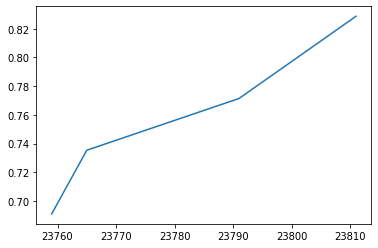

In [187]:
plt.plot(np.abs(np.pi/2-w))

In [192]:
np.abs(np.pi/2-w)

23759    0.691000
23765    0.735383
23791    0.771401
23811    0.828731
dtype: float64

In [359]:
# file = search_for_file()
# file = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log.csv'

# file = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.5/ic_200x200.001.13_log.csv'

file = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.4/ic_200x200.001.13_log.csv'


In [360]:
#DONE: measure for angular difference from 90º
df = pd.read_csv(file)

d = df.grad_ux*df.grad_vx + df.grad_uy*df.grad_vy
q = ( df.grad_ux*df.grad_ux + df.grad_uy*df.grad_uy ) * ( df.grad_vx*df.grad_vx + df.grad_vy*df.grad_vy  )
w = np.arccos(d/q).values
df['alpha'] = np.abs(np.pi/2-w)

In [371]:
#DONE: filter by angular difference from 90º
alpha_threshold = 0.6
gf = df[df.alpha<=alpha_threshold].copy()

In [372]:
#print the percent of trials remain
print(f'percent of trials remain = {100*gf.x.values.size/df.x.values.size:.1f}%')

percent of trials remain = 99.6%


In [373]:
#TODO: recompute tip number
# for a in gf.groupby('t').n.count().iter_rows():
#     pass
hf = gf.groupby('t').x.count()/2#divide by 2 because each tip is erroneously counted twice.
n_series = hf.values
t_series = hf.index.values
t_series

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.8578e+04, 2.8579e+04,
       2.8580e+04])

In [374]:
#DONE: recompute tip number
for j,t in enumerate(t_series):
    gf.loc[gf.t==t,'n']=n_series[j]

In [375]:
fn = file.replace('log.csv',f'log_filtered_alpha_{alpha_threshold}.csv')
gf.to_csv(fn)
beep(1)

0

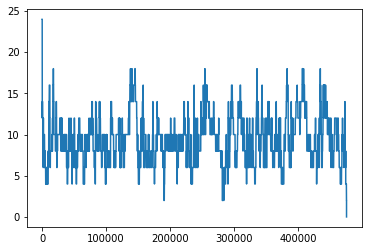

In [376]:
plt.plot(df.n)

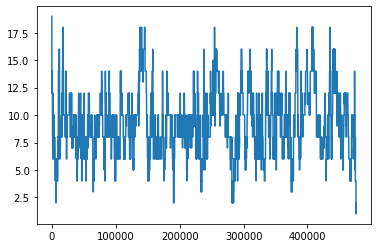

In [377]:
plt.plot(gf.n)

In [378]:
#DONE: compute bdrates from ^that
_,df_rates = compute_bdrates_from_log_w_mean(src=fn, min_time_to_next_event = 0, min_time = 100)
# n_series[j]

In [379]:
#TODO: visualize bdrates
rf = df_rates[df_rates.dn==2]
x_values = rf.n.values/2
y_values = rf.rate.values

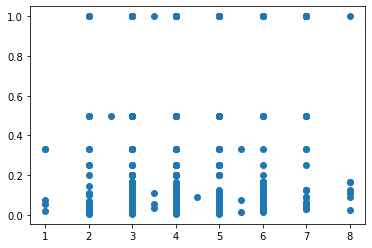

In [380]:
plt.scatter(x_values,y_values)

are there repeats in this data?  Yes. Every datum exists twice...

I don't know why the birth death rates aren't looking reasonable yet...

In [381]:
# df[df.t==1000]
fn

'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.4/ic_200x200.001.13_log_filtered_alpha_0.6.csv'

In [304]:
#DONE: collect images into a few slides.
#DONE  show bdrates agree with old values
#DONE: show virtual spiral tips have this angular property

# TODO: search for other features that distinguish virtual spiral tips not filtered by  | π/2 – θ | < 0.5

In [407]:
fn = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log.csv'
# fn = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log_filtered.csv'
# fn = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log_filtered_alpha_0.5.csv'
_,df_rates = compute_bdrates_from_log_w_mean(src=fn, min_time_to_next_event = 0, min_time = 100)


In [408]:
#TODO: visualize bdrates
rf = df_rates[df_rates.dn==2]
x_values = rf.n.values/2
y_values = rf.rate.values

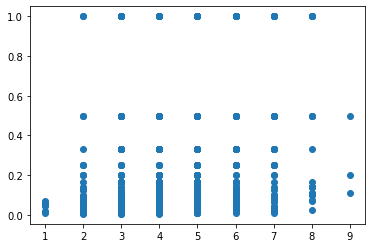

In [409]:
plt.scatter(x_values,y_values)

In [410]:
set(df_rates.dn.values)

{-6, -4, -2, 2, 4, 6}

In [322]:
#TODO: try V_threshold = 0.5 or 0.4 if 0.6 is giving some dn = ±1 events still after filtering

In [358]:
#TODO: select high frequency events and isolate those times
#TODO: isolate tips from those times
#TODO: 

# TODO: for each trajectory, compute alpha, dalpha_dt, and then filter any alpha that is large and increasing
OR
- TODO: visualize alpha versus time for all PID present
- TODO: visualize alpha versus time for a normal birth death event
- TODO: visualize alpha versus time for another high frequency birth death event
- 

In [590]:
file = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_traj_sr_400_mem_2.csv"
# = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.6/ic_200x200.001.13_log.csv'
df = pd.read_csv(file)

t = 1520
boo = (df.t>=t-3)&(df.t<=t+3+3+30)
gf = df[boo]

In [591]:
print(set(gf.particle.values))
pid_lst = [162, 170, 172, 192, 200, 206, 208, 210, 212, 116]

{162, 163, 170, 171, 172, 173, 192, 193, 200, 201, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 116, 117}


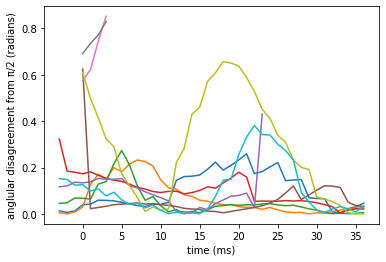

In [592]:
# plt.figure(figsize=(6,6))
for pid in pid_lst:
    ff = gf[gf.particle==pid]#.describe().T
    d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
    q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
    w = np.arccos(d/q).values
    alpha = np.abs(np.pi/2-w)
    y_values = alpha
    x_values = ff.t.values-t
    plt.plot(x_values,y_values)
plt.xlabel('time (ms)')
plt.ylabel('anglular disagreement from π/2 (radians)')
plt.show()

In [605]:
file = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.5/ic_200x200.001.13_traj_sr_400_mem_2.csv"
df = pd.read_csv(file)

t = 1520
boo = (df.t>=t-3)&(df.t<=t+3+3+50)
gf = df[boo]

In [606]:
print(set(gf.particle.values))
pid_lst = list(set(gf.particle.values))#[162, 170, 172, 192, 200, 206, 208, 210, 212, 116]

{134, 135, 138, 139, 140, 141, 160, 161, 172, 173, 178, 179, 180, 181, 182, 183, 184, 185, 86, 87}


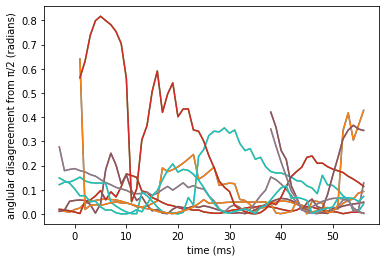

In [607]:
# plt.figure(figsize=(6,6))
for pid in pid_lst:
    ff = gf[gf.particle==pid]#.describe().T
    d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
    q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
    w = np.arccos(d/q).values
    alpha = np.abs(np.pi/2-w)
    y_values = alpha
    x_values = ff.t.values-t
    plt.plot(x_values,y_values)
plt.xlabel('time (ms)')
plt.ylabel('anglular disagreement from π/2 (radians)')
plt.show()

In [572]:
gf.groupby('t').n.mean()

t
1517.0    6
1518.0    6
1519.0    6
1520.0    6
1521.0    8
1522.0    8
1523.0    8
1524.0    8
1525.0    8
1526.0    8
Name: n, dtype: int64

In [595]:
# # track V_threshold = 0.4
# file = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.4/ic_200x200.001.13_log.csv"
# df = pd.read_csv(file)

# # t = 1520
# # boo = (df.t>=t-3)&(df.t<=t+3+3)
# # gf = df[boo]

# #(slow) assign each time a unique frame number
# t_list =  sorted(set(df.t.values))
# frameno_list = list(range(len(t_list)))
# df['frame'] = -9999
# for frameno, t in zip(frameno_list,t_list):
#     df.loc[df.t==t, 'frame'] = frameno
# #assert that all entries were given a value
# assert ( not (df.frame<0).any() )
# beep(1)
# # #first: use the trivial filter
# # # "tip_log_ic_200x200.120.32_V_0.4__t_1e+03.csv"
# # boo = [i is not None for i in df.index]
# # dg = df.loc[boo]

# # dh = dg.groupby('t').mean()[['n']]
# # dh.reset_index(inplace=True)

0

In [596]:
# import trackpy, sklearn
# # h = 0.007
# mem = 2
# sr  = 400 #consider all tip pairs
# width, height = 200, 200 # txt.shape[:2]
# distance_L2_pbc = get_distance_L2_pbc(width,height)

# link_kwargs = {
#     'neighbor_strategy' : 'BTree',
#     'adaptive_step':0.5,
#     'adaptive_stop': 1e-5,
#     'dist_func'         : distance_L2_pbc,
#     'memory': mem,
#     'search_range':sr
# }

# # df['frame'] = np.around(df['t']/h)
# # df = df.astype(dtype={'frame':int}).copy()

# traj = trackpy.link_df(
#     f=df.head(-1),t_column='frame',**link_kwargs)
# # traj = trackpy.link_df(
# #     f=df.dropna(),t_column='frame',**link_kwargs)

# beep(1)



Frame 28580: 4 trajectories present.


0

In [598]:
# df_dir = file
# save_fn = df_dir.replace('log.csv', f'traj_sr_{sr}_mem_{mem}.csv')
# traj.to_csv(save_fn, index=False)
# print ( save_fn )

/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.4/ic_200x200.001.13_traj_sr_400_mem_2.csv


In [599]:
# import trackpy, sklearn, pandas as pd, numpy as np
# from lib.dist_func import *

# def compute_bdrates(input_file_name, mem = 2, sr  = 400, width = 200, height = 200):
#     df = pd.read_csv(file)

#     #(slow) assign each time a unique frame number
#     t_list =  sorted(set(df.t.values))
#     frameno_list = list(range(len(t_list)))
#     df['frame'] = -9999
#     for frameno, t in zip(frameno_list,t_list):
#         df.loc[df.t==t, 'frame'] = frameno
#     #assert that all entries were given a value
#     assert ( not (df.frame<0).any() )
    
#     #consider all tip pairs
#     # width, height = 200, 200 # txt.shape[:2]
#     distance_L2_pbc = get_distance_L2_pbc(width,height)

#     link_kwargs = {
#         'neighbor_strategy' : 'BTree',
#         'adaptive_step':0.5,
#         'adaptive_stop': 1e-5,
#         'dist_func'         : distance_L2_pbc,
#         'memory': mem,
#         'search_range':sr
#     }

#     # df['frame'] = np.around(df['t']/h)
#     # df = df.astype(dtype={'frame':int}).copy()
#     traj = trackpy.link_df(
#         f=df.head(-1),t_column='frame',**link_kwargs)
#     return traj

# def routine_bdrates(input_file_name, mem = 2, sr  = 400, width = 200, height = 200):
#     traj = compute_bdrates(input_file_name, mem = 2, sr  = 400, width = 200, height = 200)
#     save_fn = input_file_name.replace('log.csv', f'traj_sr_{sr}_mem_{mem}.csv')
#     traj.to_csv(save_fn, index=False)
#     return save_fn

{138, 139, 142, 143, 144, 145, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 98, 99, 116, 117}


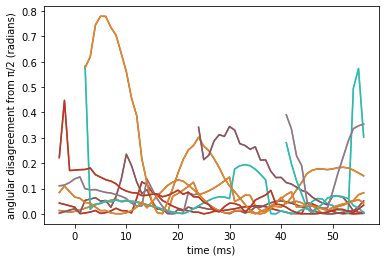

In [603]:
file = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_0.4/ic_200x200.001.13_traj_sr_400_mem_2.csv"
df = pd.read_csv(file)

t = 1520
boo = (df.t>=t-3)&(df.t<=t+3+3+50)
gf = df[boo]

print(set(gf.particle.values))
pid_lst = list(set(gf.particle.values))#[162, 170, 172, 192, 200, 206, 208, 210, 212, 116]

# plt.figure(figsize=(6,6))
for pid in pid_lst:
    ff = gf[gf.particle==pid]#.describe().T
    d = ff.grad_ux*ff.grad_vx + ff.grad_uy*ff.grad_vy
    q = ( ff.grad_ux*ff.grad_ux + ff.grad_uy*ff.grad_uy ) * ( ff.grad_vx*ff.grad_vx + ff.grad_vy*ff.grad_vy  )
    w = np.arccos(d/q).values
    alpha = np.abs(np.pi/2-w)
    y_values = alpha
    x_values = ff.t.values-t
    plt.plot(x_values,y_values)
plt.xlabel('time (ms)')
plt.ylabel('anglular disagreement from π/2 (radians)')
plt.show()


In [608]:
#TODO: compute bdrates for each V_threshold

In [609]:
# df = pd.read_csv(file)

In [639]:
V_threshold = 0.6
file = f"/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/fast_kernel_V_{V_threshold}/ic_200x200.001.13_log.csv"
df_output, gf = compute_bdrates_from_log_w_mean(
    src=file,
    min_time_to_next_event=0,
    min_time=100,)

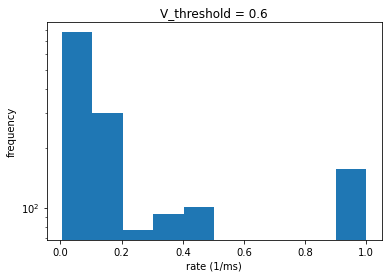

In [640]:
plt.hist(gf.rate.values)
plt.title(f"V_threshold = {V_threshold}")
plt.xlabel('rate (1/ms)')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

In [633]:
np.max(gf.rate.values)

1.0